<a href="https://colab.research.google.com/github/Ricardoogawa22/data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Análise dos Dados do Airbnb - *Tóquio*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Tóquio, e ver quais insights podem ser extraídos a partir de dados brutos.**

##**Sobre Tóquio**.

 Tóqui é a capital do Japão e está no grupo das maiores metrópolis do mundo. Onde concentra o centro político, econômico, educacional e cultural do Japão.
 O Japão já esteve no topo do do ranking das cidades mais caras do mundo, mas hoje ocupa a 5° lugar. Possuindo tambem o título de maior aglomeração de pessoas por metro quadrado. 


![picture](https://media.gettyimages.com/id/904453184/pt/foto/mt-fuji-and-tokyo-skyline.jpg?s=612x612&w=gi&k=20&c=25bowIy_subZ5oV9JSMLsffC_ft_hrVUTE1vjRCw8GU=)

## Obtenção dos Dados

  Nessa analise usaremos as bibliotecas de python:
*	Pandas – manipulação dos dados
*	Matplotlib – criação de gráficos
*	Seaborn - criação de gráficos




In [ ]:
# importando os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

Em seguida adicionamos os dados usando a tabéla fornecida pelo Airbnb, utilizando o pandas.

In [ ]:
# importando o arquivo listings.csv para um DataFrame
df=pd.read_csv('http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2022-09-22/visualisations/listings.csv')


## Análise dos Dados


**Dicionário das variáveis**

* id = número gerado para identificação de cada imóvel 
* name = nome da propriedade
* host_id = número gerado para o proprietário do imóvel
* host_name = nome do proprietário
* neighbourhood_group = não há informações nesta coluna
* neighbourhood = Bairro onde se localiza a propriedade
* latitude = coordenada de latitude da propriedade
* longitude = coordenada de longitude da propriedade
* room_type = tipo de quarto anuniado
* price = preço do anuncia do imóvel (ienes)
* minimum_nights = quantidade minima de noites que pode-se alugar
* number_of_reviews = quantidade de reviews feitas por locatarios
* last_reviews = data do último review feito do imóvel
* reviews_per_month = quantidade de reviews feita no mês
* calulated_host_listings_ount = quantidade de imóveis anuniado pelo mesmo proprietário
* quantidade de dias que o imovel está disponivel dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45120811,"Guest House 7 min to Disney, New open",289820207,Koki,NaN,Edogawa Ku,35.65802,139.89506,Entire home/apt,17400,1,23,2022-08-20,0.95,1,258,12,M120025987
1,40069353,留连之家民宿,39884149,钦雄,NaN,Edogawa Ku,35.71645,139.92855,Entire home/apt,3266,2,14,2022-08-15,0.42,2,41,6,M120020038
2,39568366,Museum House！202探し歩き回る時間がもったいない!最寄り駅徒歩2分ディズニー25分,184746369,Takahiro,NaN,Edogawa Ku,35.67108,139.90337,Entire home/apt,10000,3,9,2021-02-19,0.26,2,88,0,M120020993
3,25414793,Free boxing training! 2 bunk beds dormitory.,162227924,Kai,NaN,Hachioji Shi,35.63138,139.20242,Shared room,4500,1,74,2022-05-04,1.41,2,56,5,Hotels and Inns Business Act | 相模原市保健所 | 相模原市指...
4,9032305,Good Location! Near Tokyo Disneyland and Airport!,47146177,Satoshi,NaN,Edogawa Ku,35.71470,139.92604,Entire home/apt,11000,2,111,2022-08-31,1.47,1,161,9,M120000370


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))
display(df.dtypes)

Entradas:	 9823
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Podemos observar que são 9823 entradas, com 18 tipos de variáveis, sendo dos tipos, textos, números inteiros e números decimais.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.155451
last_review                       0.155451
license                           0.003461
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Vemos que o grupo neighbourhood_group, está com 100% dos dados ausentes. 
Com isso excluimos a coluna e as linhas que não tem informações.

In [ ]:
#excluindo coluna com dados ausentes
df.drop(columns=['neighbourhood_group'], inplace=True)

#excluindo entradas com dados ausentes
df.dropna(axis=0, inplace=True)

### **Q3. Qual o tipo de distribuição das variáveis?** 

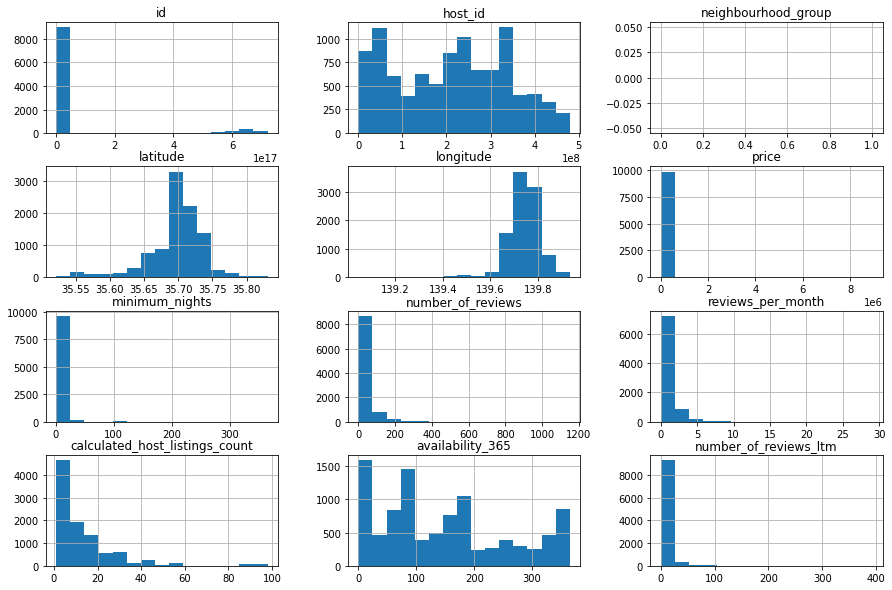

In [ ]:
df.hist(bins=15, figsize=(15,10));

Com os graficos, podemos observar que existem muitas informações, mas não conseguimos enxergar nada.

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.823000e+03,9823.000000,9823.000000,8296.000000,9823.000000,9823.000000
mean,1.498582e+04,2.540466,30.385320,1.025065,13.270589,147.204011
std,9.755941e+04,8.975734,49.984574,1.318514,15.776658,112.520247
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,5.200000e+03,1.000000,2.000000,0.300000,3.000000,62.000000
50%,8.000000e+03,1.000000,11.000000,0.690000,8.000000,130.000000
75%,1.330100e+04,2.000000,38.000000,1.290000,17.000000,225.000000
max,8.928571e+06,365.000000,1150.000000,28.990000,98.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de ¥13300, porém seu valor máximo é ¥8928571.
* A quantidade mínima de noites (`minimum_nights`) é de 365 dias no ano.



#### Boxplot para price

Iremos idenficar os outliers dentro das variais price e definir limites máximo e mínimo para a variável.

In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price:, IQR_price')

# definindo os limites

sup_price = q3_price + 1.5* IQR_price
inf_price = q1_price - 1.5* IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:, IQR_price
Limite superior de price:  25452.5
Limite inferior de price:  -6951.5


Agora com os limites definidos, podemos plotar um gráfico para enxergar a diferença entre os números, e verificar quantas entradas fora dos milites teremos e saber qual a porcentagem de informações serão perdidas.

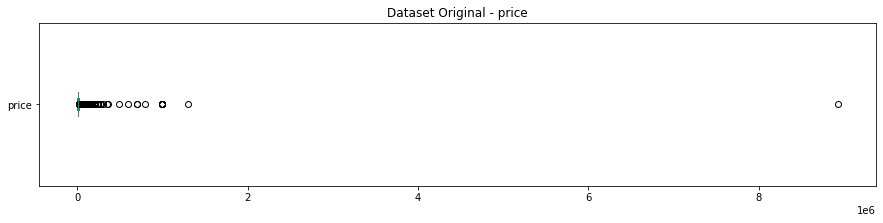

O dataset possui 9823 colunas
844 Entradas acima de 25452.5
Representam 8.59% do dataset


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False, figsize=(15,3))
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 25452.5".format(len(df[df.price > 25452.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 25452.5]) / df.shape[0])*100))

#### Boxplot para minimum_nights

Fazemos o mesmo com as variais minimum_nights.

In [ ]:
# identificando os outliers para a variável price
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights:, IQR_minimum_nights')

# definindo os limites

sup_minimum_nights = q3_minimum_nights + 1.5* IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5* IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)


IQR da variável minimum_nights:, IQR_minimum_nights
Limite superior de minimum_nights:  3.5
Limite inferior de minimum_nights:  -0.5


Agora com os limites definidos, plotamos um gráfico e coletamos as mesmas informações que tiramos do price.

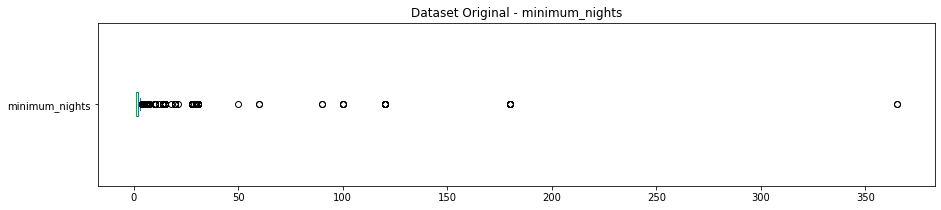

O dataset possui 9823 colunas
677 Entradas acima de 3.5
Representam 6.89% do dataset


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 3.5".format(len(df[df.minimum_nights > 3.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 3.5]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

In [ ]:
#limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 25452.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 3.5].index, axis=0, inplace=True)

print('Shape antes da limpeza', df.shape)
print('Shape depois da limpeza', df_clean.shape)

Shape antes da limpeza (9823, 18)
Shape depois da limpeza (8320, 18)


Podemos observar que a quantidade de linhas perdidas foram de 1503. Oque não é tão considerável assim. Contando com a qualidade da informações que teremos. 

#### Comparando o boxplot

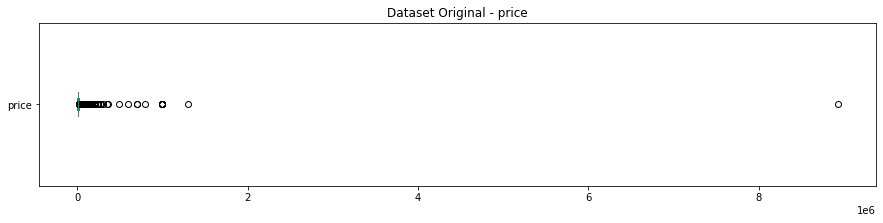

O dataset possui 9823 colunas
844 Entradas acima de 25452.5
Representam 8.59% do dataset


In [ ]:
#Plotando novamente o boxplot original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False, figsize=(15,3))
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 25452.5".format(len(df[df.price > 25452.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 25452.5]) / df.shape[0])*100))


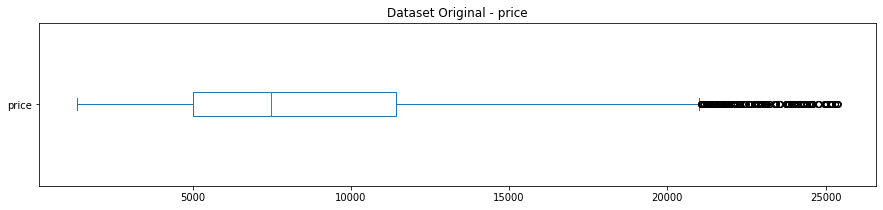

Tamanho original: 9823 colunas
tamanho atual: 8320 colunas


In [ ]:
#Plotando novamente o boxplot limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False)
ax.set_title('Dataset Original - price')
plt.show()
print('Tamanho original: {} colunas'.format(df.shape[0]))
print('tamanho atual: {} colunas'.format(df_clean.shape[0]))

Agora podemos ver o resultado da limpeza realizada nos nossos dados. 

O boxplot ainda mostra alguns dados como outliers. Porem os mesmo estão sendo calculados em relação ao novo dataset, que levou em consideração os quartis dos dados originais.

Agora, vamos observar os histogramas novamente, para que tenhamos certeza que não existem outliers que possam prejudicar nossa análise.


In [ ]:
# verificando as distribuições 
df_clean.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.320000e+03,8.320000e+03,0.0,8320.000000,8320.000000,8320.000000,8320.000000,8320.000000,7086.000000,8320.000000,8320.000000,8320.000000
mean,6.012424e+16,2.158217e+08,NaN,35.697815,139.738455,8900.406731,1.403486,31.480769,1.065651,13.740745,148.233413,7.091827
std,1.861392e+17,1.286103e+08,NaN,0.041876,0.075613,5157.211560,0.597959,51.430297,1.344525,16.285778,111.050865,15.127681
min,1.976770e+05,7.716940e+05,NaN,35.524580,139.130167,1350.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.101968e+07,9.519066e+07,NaN,35.688030,139.700247,5019.250000,1.000000,2.000000,0.330000,4.000000,64.000000,0.000000
50%,4.105223e+07,2.267837e+08,NaN,35.703480,139.733205,7469.500000,1.000000,11.000000,0.730000,8.000000,133.000000,2.000000
75%,4.884369e+07,3.218137e+08,NaN,35.719230,139.790350,11430.000000,2.000000,39.000000,1.330000,18.000000,223.000000,8.000000
max,7.205120e+17,4.795821e+08,NaN,35.830640,139.933540,25393.000000,3.000000,1150.000000,28.990000,98.000000,365.000000,392.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5932064700>,
      dtype=object)

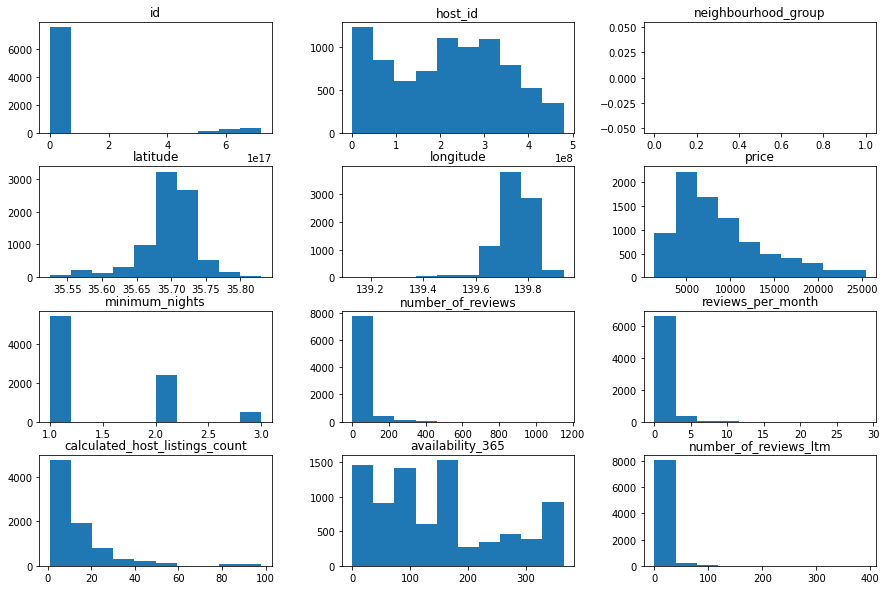

In [ ]:
# verificando a distribuição estatística dos dados limpos

df_clean.hist(figsize=(15,10), grid=False)

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()


display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.021534,0.047831,0.067706,-0.154060,0.004483
minimum_nights,-0.021534,1.000000,-0.056829,-0.099126,-0.026272,-0.034032
number_of_reviews,0.047831,-0.056829,1.000000,0.693047,-0.162941,0.001045
reviews_per_month,0.067706,-0.099126,0.693047,1.000000,-0.096383,0.030161
calculated_host_listings_count,-0.154060,-0.026272,-0.162941,-0.096383,1.000000,0.000871
availability_365,0.004483,-0.034032,0.001045,0.030161,0.000871,1.000000


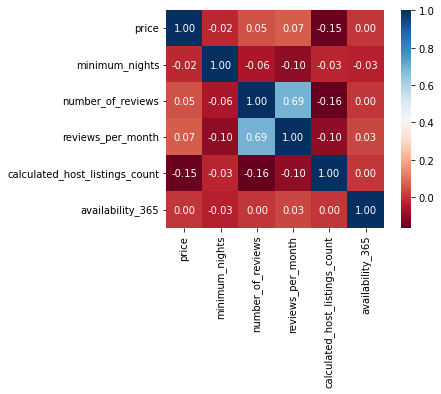

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
df_clean.room_type.value_counts()

Entire home/apt    6473
Private room       2323
Hotel room          329
Shared room         237
Name: room_type, dtype: int64

Vemos que a grande maioria dos tipos de imóveis que estão sendo alugados, são casa ou apartamentos inteiros.

In [ ]:
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.691412
Private room       0.248131
Hotel room         0.035142
Shared room        0.025315
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Hinohara Mura     30686.000000
Mitaka Shi        16424.111111
Okutama Machi     15219.000000
Chiyoda Ku        13054.808081
Musashino Shi     12728.600000
Meguro Ku         12307.437500
Minato Ku         12113.383333
Shibuya Ku        11935.392593
Chuo Ku           11172.417508
Nishitokyo Shi    11110.250000
Name: price, dtype: float64

Acima, vemos que bairros como Hinohara, Kodahara, e Mitaka estão com média de preço superior a de lugares como Shibuya, ,Shinjuku e Shinagawa.

Uma pessoa que não conhecesse Tóquio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Hinohara Mura.

In [ ]:
print(df_clean[df_clean.neighbourhood == "Hinohara Mura"].shape)

df_clean[df_clean.neighbourhood == "Hinohara Mura"]

(1, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9687,19512934,Classic Japanese farm house (min 4 pax required),137040470,Yoko,Hinohara Mura,35.69177,139.04543,Entire home/apt,30686,1,89,2022-08-28,1.4,1,62,17,Hotels and Inns Business Act | 山梨県 | 山梨県指令 富東福...


Como vimos cidade de Hinahara Maru tem a média mais alta da cidade. Porem, ao consultar a quantidade de imóveis, podemos enxergar que há apenas 1 no bairro, que fica em uma região afastada e turística. Onde o locatário vive uma experiencia diferenciada, o que deixa seu valor elevado.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.



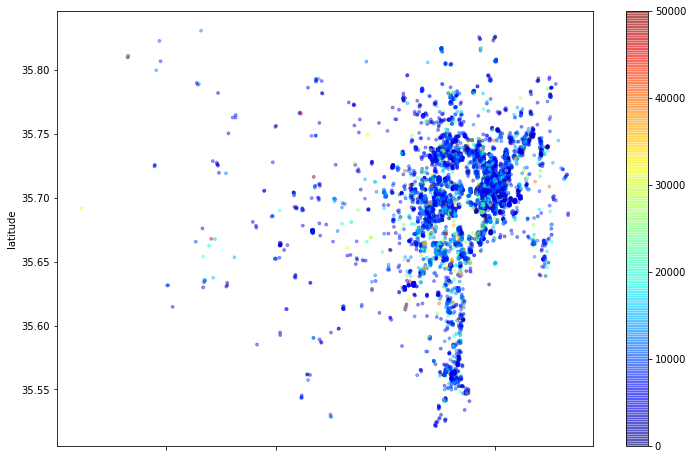

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

Conseguimos observar que a grande maioria dos imóveis se localizam na região próxima ao mar, e na região próxima ao centro central. 

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
df.minimum_nights.mean()

2.5404662526723

## Conclusões


Mesmo com uma análise superficial na base de dados fornecida pelo Airbnb, foi possível perceber que existem outliers dentro de algumas variáveis.

Também foi possível notar que existem bairros com quantidade pequena de imóveis, que podem destorcer as informações estatísticas de alguns atributos.

Por fim, ressalta-se que este dataset é uma versão resumida, servindo apenas para abordagens iniciais. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 75 atributos disponíveis.
